# Plot of McCormick relaxations of simple 1-D function 

[Matthew Wilhelm](https://psor.uconn.edu/person/matthew-wilhelm/)  
Department of Chemical and Biomolecular Engineering, University of Connecticut

## Calculation of relaxations
In the below example, we illustrate how a method-overloading approach can be used to construct differentiable[1] and nonsmooth[2,3,4] McCormick relaxations of the function $f(x) = 2x-\exp(x)\sin(10x)$ on $[-2,2]$.

Begin by importing, the necessary packages. We'll store our data to a `DataFrame`[5] structure for easy manipulation. 

A variable `X` is set to an interval $[-2,2]$. EAGO currently using the IntervalArithmetic.jl[6] package for interval calculations but can support other libraries if desired. Next, the McCormick object is constructed using `MC{N}`. This constructor sets the convex/concave relaxations to x, the interval bounds to X, and sets the 1st element of the subgradient to 1.0 while all other elements are set to zero. This is passed to the function which then directly overloads the calculations and computes the relaxations of `f` at `x` on `X`.

In [1]:
using EAGO, DataFrames, IntervalArithmetic

# initializes function to explicitly solve for x
f(x) = 2*x - exp(x)*sin(10*x)

# create a data frame to store output data
df = DataFrame(x = Float64[], y = Float64[], cv1 = Float64[], cv2 = Float64[],
               cc1 = Float64[], cc2 = Float64[], l1 = Float64[], l2 = Float64[],
               u1 = Float64[], u2 = Float64[])

X = EAGO.IntervalType(-2,2)
xrange = range(X.lo,stop=X.hi,length=100)
for x in xrange
    y = f(x)
    x_mc = MC{1}(x,X,1)
    f_mc = f(x_mc)
    set_mc_differentiability!(1)
    f_dmc = f(x_mc)
    save_tuple = (x, y, f_dmc.cv, f_mc.cv, f_dmc.cc, f_mc.cc,
                  lo(f_dmc.Intv), lo(f_mc.Intv), hi(f_dmc.Intv), hi(f_mc.Intv))
    push!(df, save_tuple)
    set_mc_differentiability!(0)
end

## Visualization of the relaxation

The relaxation can then be plotted as shown below using the Plots.jl[7] package with the PlotlyJS backend.

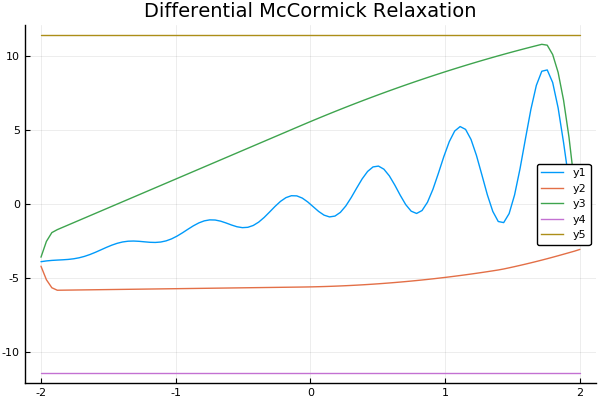

In [2]:
using Plots
pyplot()

data_dmc = [df.y,df.cv1,df.cc1,df.l1,df.u1]
data_mc = [df.y,df.cv2,df.cc2,df.l2,df.u2]
p1 = Plots.plot(xrange, data_dmc, title="Differential McCormick Relaxation")

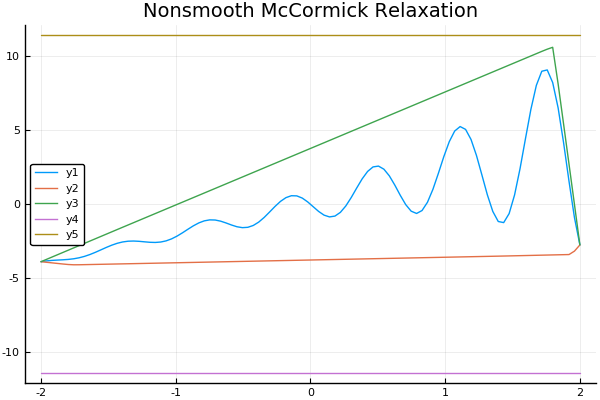

In [3]:
p2 = Plots.plot(xrange, data_mc, title="Nonsmooth McCormick Relaxation")

Observe that the relaxations obtained after calling  `set_mc_differentiability!(0)` are nonsmooth but somewhat tighter while the relaxations obtained after calling `set_mc_differentiability!(1)` are differentiable but somewhat looser.

### References:
1. Khan, K.A., Watson, H.J. and Barton, P.I., Differentiable McCormick relaxations, *Journal of Global Optimization*, *Springer*, **2017**, 67(4), 687-729.
2. McCormick, G.P., Computability of global solutions to factorable nonconvex programs: Part I --- Convex underestimating problems, *Mathematical Programming*, **1976**, 10(1), 147-175
3. Mitsos, A. Chachuat, B., & Barton, P.I., McCormick-based relaxations of algorithms, *SIAM Journal on Optimization*, *SIAM*, **2009**, 20(2), 573-601.
4. Scott, J.K., Stuber, M.D., & Barton, P.I., Generalized McCormick relaxations, *Journal of Global Optimization*, *Springer*, **2011**, 51, 569-606.
5. DataFrames.jl [Computer software] (2019). Retrieved from https://github.com/JuliaData/DataFrames.jl
6. IntervalArithmetic.jl [Computer software] (2019). Retrieved from https://github.com/JuliaIntervals/IntervalArithmetic.jl
7. Plots.jl [Computer software]. (2019). Retrieved from https://github.com/JuliaPlots/Plots.jl